In [1]:
from faststock import Stock
from safeacc import SafeAccountController as Account
import random
from strats import SimpleStrat
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from statistics import mean

100%|██████████| 1000/1000 [00:02<00:00, 368.04it/s]


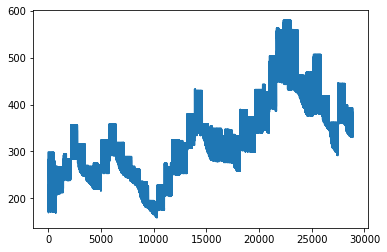

In [378]:
random.seed()
s = Stock()
accs_amount = 50
accounts = [Account(s) for _ in range(accs_amount)]
bots = [SimpleStrat(acc, 200 + random.randint(-100, 100)) for acc in accounts]
iters = 1000
noise_freq = 25

alpha = 0.2
beta = 0.22

for i in tqdm(range(iters)):

    if i != 0 and i % noise_freq == 0:
        av_th = mean([bot.threshold for bot in bots])
        left = int((1 - alpha) * av_th)
        right = int(av_th * (1 + beta))
        new_th = max(2, random.randint(left, right))

    for bot in bots:
        if i != 0 and i % noise_freq == 0:
            left = int(new_th * (1 - alpha))
            right = int(new_th * (1 + beta))
            bot.set_threshold(max(2, random.randint(left, right)))
        bot.make_decision()
        bot.acc.check_balance()

    s.dump_accounts_table()
    s.dump_order_book()
    random.shuffle(bots)

prices = s.history
plt.plot(prices)
plt.show()

100%|██████████| 100000/100000 [00:29<00:00, 3371.71it/s]


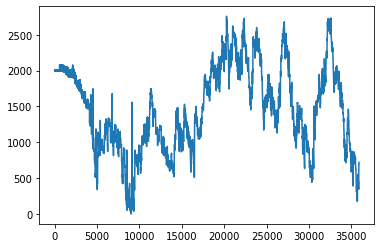

In [381]:
random.seed()
s = Stock()
accs_amount = 50
accounts = [Account(s) for _ in range(accs_amount)]
bots = [SimpleStrat(acc, 2000 + random.randint(-5, 5)) for acc in accounts]
iters = 100000
noise_freq = 25

ths = []


for i in tqdm(range(iters)):
    
    av_th = mean([bot.threshold for bot in bots])
    ths.append(av_th)
    
    for bot in bots:
        if i != 0 and i % noise_freq == 0:
             bot.set_threshold(max(2, bot.threshold + random.randint(-100, 105)))

        bot.make_decision()
        bot.acc.check_balance()

    s.dump_accounts_table()
    s.dump_order_book()
    random.shuffle(bots)

prices = s.history
plt.plot(prices)
plt.show()

Acc created
Acc created
Acc created
Acc created
Acc created


100%|██████████| 5/5 [00:00<00:00, 27.00it/s]


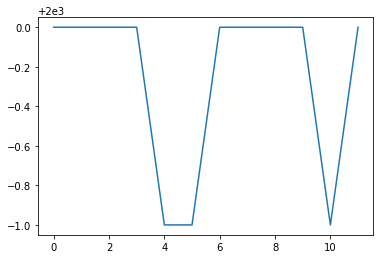

In [2]:
random.seed()
s = Stock('stock.log')
accs_amount = 5
accounts = [Account(s) for _ in range(accs_amount)]
bots = [SimpleStrat(acc, 2000 + random.randint(-5, 5)) for acc in accounts]
iters = 5
noise_freq = 100

for i in tqdm(range(iters)):
    
    av_th = mean([bot.threshold for bot in bots])
    
    for bot in bots:
        if i != 0 and i % noise_freq == 0:
             bot.set_threshold(max(2, bot.threshold + random.randint(-100, 105)))

        bot.make_decision()
        bot.acc.check_balance()

    s.dump_accounts_table()
    s.dump_order_book()
    s.dump_solana_balances()
    random.shuffle(bots)

prices = s.history
plt.plot(prices)
plt.show()

In [3]:
s.__del__()